In [59]:
import warnings
warnings.filterwarnings('ignore')

# 비지도 학습
- Target이 없는 데이터를 분류하기
- 군집화, 차원축소

---
# 군집 알고리즘
- 과일 데이터 사진을 보고 사과, 파인애플, 바나나로 분류하기

In [60]:
# 이미지 데이터는 정규화되어 numpy 배열로 저장되어 있음
import numpy as np

fruits = np.load('data/fruits.npy')
print(fruits.shape)

(300, 100, 100)


> 흑백 이미지   
> 100x100 픽셀의 이미지 300개   
> 100개는 사과, 100개는 파인애플, 100개는 바나나

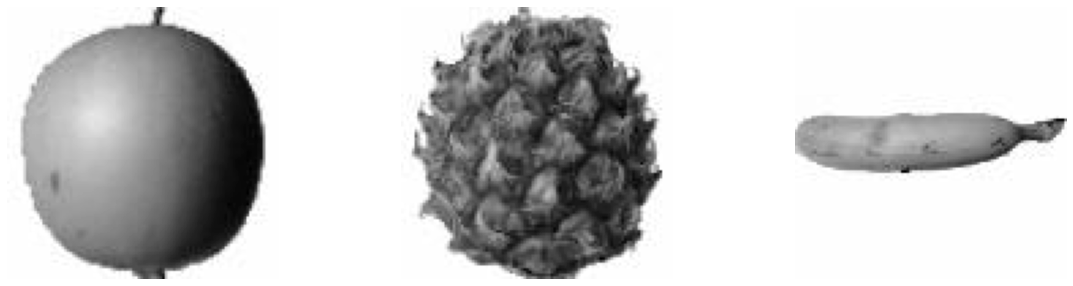

In [61]:
# 시각화
import matplotlib.pyplot as plt
# 한 번에 3개의 이미지를 표시
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for i in range(3):
    axs[i].imshow(fruits[i*100], cmap='gray_r')
    axs[i].axis('off')

plt.show()

### 샘플 차원 변경하기
- 현재 3차원의 배열을 분석을 위해 2차원 배열로 변경
- 배열 중 page단의 수는 apple, pineapple, banana로 분류하게 변경하기

In [62]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

apple.shape # 1~100까지 100*100 크기의 배열(10000)

(100, 10000)

In [63]:
# 픽셀값 분석하기
# 각 행 별 픽셀 값의 평균이 비슷하지 않을까?
apple_means = apple.mean(axis=1)
pineapple_means = pineapple.mean(axis=1)
banana_means = banana.mean(axis=1)

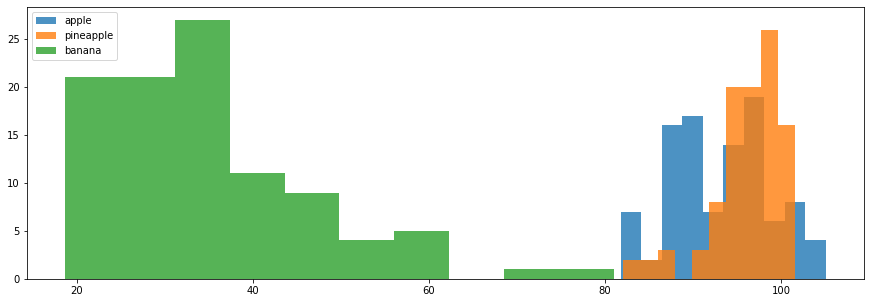

In [64]:
# 과일 별 means 시각화
plt.figure(figsize=(15, 5))
plt.hist(apple_means, alpha=0.8, label='apple')
plt.hist(pineapple_means, alpha=0.8, label='pineapple')
plt.hist(banana_means, alpha=0.8, label='banana')
plt.legend()

plt.show()

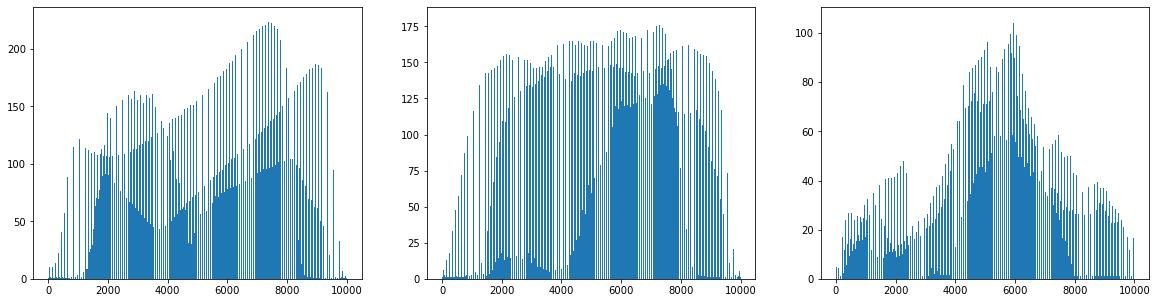

In [65]:
# Feature(픽셀별) 평균의 막대 그래프 그리기
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()


### 평균값으로 만든 이미지 -> 겹쳐보기랑 비슷

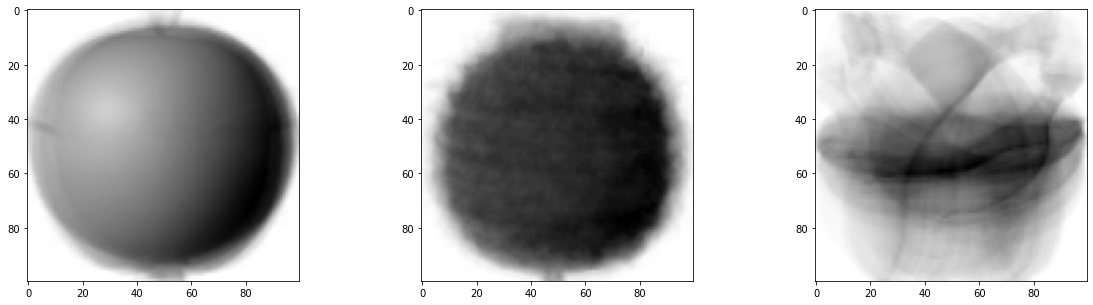

In [67]:
# 평균 이미지로 그림 표현하기: 이미지로 그리기 위해 다시 2차원 배열 만들기 > 잘 되면 차원축소 가능

apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

### 평균값과 가까운 사진 고르기
- 위에서 구한 평균 이미지와 각 샘플들의 픽셀값을 비교하여 가장 가까운 거리의 이미지는 해당 과일일 것이다.
- 사과만 잘 분류하는지 시도

In [68]:
abs_diff = np.abs(fruits - apple_mean) # 양수와 음수 구분 필요없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1, 2)) # abs_diff가 3차원이기 때문에 0이 아닌(페이지차원 제외) 1과 2로 평균을 내겠다
abs_mean.shape # 300개 원소로 이루어진 1차원 배열

(300,)

> abs_mean과 apple의 차이가 가장 적은 것으로 구분

In [71]:
# 300개의 데이터 중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요(arg.sort)
apple_index = np.argsort(abs_mean)[:100]
apple_index

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 30,
       68, 66, 24, 76, 15, 98, 84, 47, 90,  3, 94, 23, 32, 53, 71, 14,  7,
       73, 36, 77, 55, 21, 10, 39, 17, 99, 11, 35, 65, 95,  6, 61, 56, 22,
       89,  2, 13, 80,  0, 97,  4, 58, 40, 75, 43, 34, 82, 16, 54, 31, 49,
       93, 37, 63, 64, 41, 28, 25, 96, 67,  8, 83, 46, 19, 79, 72,  5, 85,
       20, 29, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

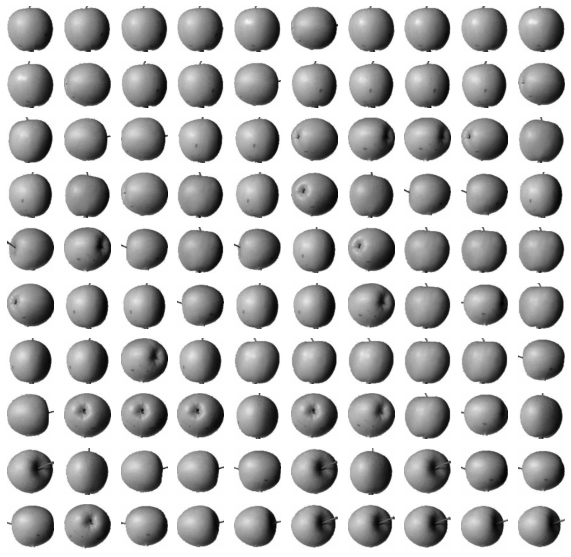

In [73]:
fig, axs = plt.subplots(10, 10 ,figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
    # axs[i, j].axis('off') 축(격자) 안 보이게
plt.show()

> 이와 같은 방법으로 비지도학습인 군집분류 알고리즘이 구성된다

---
### 바나나로 확인해보기

In [75]:
# 바나나 평균값과 차이가 적은 순으로 정렬하기
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
abs_mean.shape


(300,)

In [76]:
# 300개의 데이터 중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요(arg.sort)
banana_index = np.argsort(abs_mean)[:100]
banana_index

array([285, 212, 291, 261, 208, 286, 284, 265, 219, 276, 264, 290, 283,
       252, 255, 203, 266, 200, 201, 269, 247, 256, 281, 270, 211, 254,
       268, 239, 299, 225, 250, 275, 280, 232, 246, 205, 244, 263, 297,
       224, 279, 262, 238, 288, 289, 287, 218, 245, 217, 230, 274, 295,
       209, 220, 213, 267, 237, 229, 248, 278, 204, 243, 228, 206, 207,
       272, 241, 210, 214, 233, 222, 235, 277, 253, 294, 282, 240, 271,
       296, 249, 215, 258, 259, 227, 202, 236, 293, 260, 226, 216, 292,
       257, 221, 298, 251, 223, 242, 231,   9,  88])

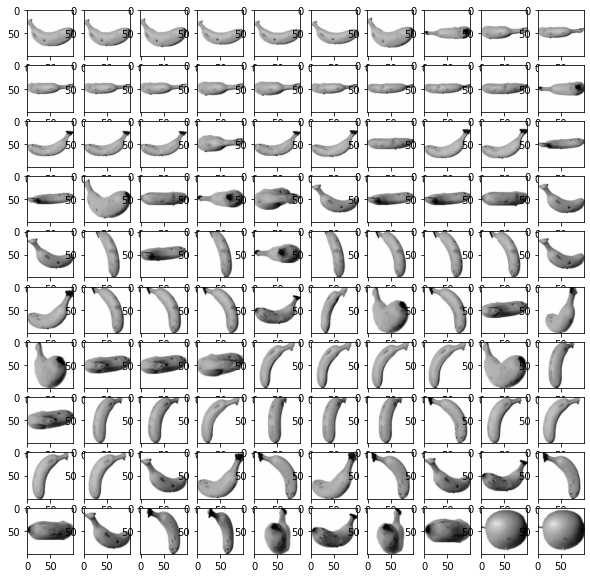

In [77]:
fig, axs = plt.subplots(10, 10 ,figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
    # axs[i, j].axis('off') 축(격자) 안 보이게
plt.show()

### 파인애플 확인해보기

In [78]:
# 파인애플 평균값과 차이가 적은 순으로 정렬하기
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
abs_mean.shape


(300,)

In [79]:
# 300개의 데이터 중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요(arg.sort)
pineapple_index = np.argsort(abs_mean)[:100]
pineapple_index

array([111, 164, 152, 136, 137, 129, 166, 165, 101, 174, 182, 150, 192,
       148, 117, 140, 100, 193, 184, 181, 162, 175, 191, 120, 154, 155,
       157, 145, 186, 121, 103, 161, 122, 138, 118, 176, 160, 127, 156,
       144, 158, 105, 104, 188, 102, 124, 198, 177, 112, 185, 133, 125,
       131, 180, 109, 115, 110, 149, 106, 187, 163, 170, 141, 159, 183,
       142, 128, 195, 147, 167, 119, 189, 190, 151, 135, 169, 123, 171,
       143, 168, 107, 108, 113, 197, 130, 139, 116, 134, 199, 172, 179,
        77, 146, 178, 114, 194, 196, 173,  32,  46])

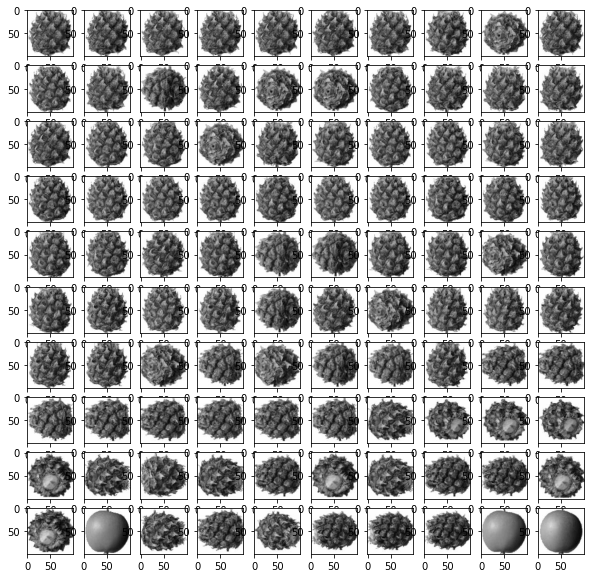

In [80]:
fig, axs = plt.subplots(10, 10 ,figsize=(10, 10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[pineapple_index[i*10+j]], cmap='gray_r')
    # axs[i, j].axis('off') 축(격자) 안 보이게
plt.show()